# Contents <a id='back'></a>

* [Introducción](#intro)
* [1. Inicialización](#data_review)
    * [1.1 Cargar datos](#data_preprocessing)
    * [1.2 Explorar datos iniciales](#header_style)
    * [1.3 Conclusiones y suiguentes pasos](#data_preprocessing_conclusions)
* [2. Tratar los valores ausentes (si hay)](#hypotheses) 
* [3. Corregir los tipos de datos](#activity)
* [4. Enriquecer datos](#activity)
* [5. Comprobar datos limpios](#week) 
* [6. Estudiar parámetros principales](#hypotheses)
* [7. Estudiar y tratar valores atípicos](#hypotheses)
* [8. Estudiar parámetros principales sin valores atípicos](#activity)
* [9. Periodo de colocación de los anuncios](#week)
* [10. Precio promedio por cada tipo de vehiculo](#genre)
* [11. Factores de precio](#genre)
* [Conclusión general](#end)

# Introducción 

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Analizaremos los datos que tenemos para poder responder a la pregunta ¿que vende un coche?, y que factores influyen en el precio de un vehículo, para esto, en algunos casos hay una forma obvia de reemplazar valores ausentes. Por ejemplo, si un campo booleano contiene solo valores True, es razonable asumir que los valores ausentes son False. Para otros tipos de datos no hay arreglos tan obvios, y hay casos en los que el hecho de que haya un valor ausente es significativo. En tales casos, no sustituyas los valores. Cuando sea apropiado, sustituye los valores. Explica por qué has decidido hacerlo así y cómo has seleccionado los valores sustitutos. Describe los factores que puedan haber resultado en valores ausentes

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

### Cargar datos

In [ ]:
# Carga el archivo de datos en un DataFrame
try:
    df_clean = pd.read_csv("vehicles_us.csv")
except:
    df_clean = pd.read_csv("/datasets/vehicles_us.csv")

### Explorar datos iniciales

In [ ]:
# imprime la información general/resumida sobre el DataFrame

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# imprimir una muestra de datos

df_clean.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
df_clean.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [ ]:
df_clean[['model','condition','fuel','transmission','type','paint_color']].value_counts()

model                     condition  fuel  transmission  type    paint_color
ford f-150                good       gas   automatic     truck   white          236
chevrolet silverado 1500  excellent  gas   automatic     truck   white          213
ford f-150                excellent  gas   automatic     truck   white          201
                                                                 black          146
chevrolet silverado 1500  good       gas   automatic     truck   white          139
                                                                               ... 
ford ranger               like new   gas   automatic     pickup  white            1
                                                         truck   black            1
                                                                 grey             1
                                                                 orange           1
volkswagen passat         salvage    gas   automatic     wagon   blue             1

el DataFrame, contine valores ausentes en algunas columnas, y en otras columnas errores de formato de ingresos de datos

La columna model_year, cylinders y odometer estan como float64 . La columna date_posted muestra datos object

La columna is_4wd es la que más datos ausentes tiene, después paint_color,odometer,cylinders y model_year respectivamente, son 5 columnas con datos ausentes en total.

### Conclusiones y siguientes pasos

Aqui podemos ver varias cosas la primera el dataframe tiene datos ausentes en las 5 columnas antes mencionadas, ademas de tener error de tipo de dato en las columnas model_year, cylinders, odometer y date_posted. También al llamar el metodo describe se aprecia que la columna is_4wd muestra solo un numero unico, y con el metodo head, se aprecia que tiene valores ausentes.
los proximos pasos seran, refelejar el total de ausentes por columnas, revisar los ausentes por columnas, determinar que hacer con los ausentes en cada columna, tratar los valores ausentes en cada columna

## Tratar los valores ausentes (si hay)

In [ ]:
df_clean.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [ ]:
porcentaje_datos_null = df_clean.isnull().sum() / len(df_clean) * 100
print(porcentaje_datos_null)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


In [ ]:
df_clean['is_4wd'].fillna(0, inplace = True)
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


En este caso la columna is_4wd se concluye que falta el dato 0 que es equivalente a sin trasmisión 4wd

In [ ]:
median_model_year = df_clean.groupby('model')['model_year'].transform('median') 

In [ ]:
df_clean['model_year'] = df_clean['model_year'].fillna(median_model_year)

In [ ]:
df_clean['model_year'].isna().sum()

0

In [ ]:
median_cylinders = df_clean.groupby('fuel')['cylinders'].transform('median') 

In [ ]:
df_clean['cylinders'] = df_clean['cylinders'].fillna(median_cylinders)

In [ ]:
df_clean['cylinders'].isna().sum()

0

Ejecute el método transform y no arrojo resultado favorable, sin embargo cambie la media por la mediana

Para las columnas model_year y cylinders se toma la decisión de imputar los datos ausentes, por la mediana para tener un análisis más certero.

In [ ]:
 df_clean['paint_color'] = df_clean['paint_color'].fillna(value='others')

En la columna paint_color, Al ser una columna categórica se pasan los ausentes a otros

In [ ]:
median_odometer = df_clean.groupby('condition')['odometer'].transform('median') 

In [ ]:
df_clean['odometer'] = df_clean['odometer'].fillna(median_odometer)

In [ ]:
df_clean['odometer'].isna().sum()

0

Se reemplaza los datos atípicos en la columna odometer por la mediana

In [ ]:
df_clean.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corregir los tipos de datos

In [ ]:
df_clean.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [ ]:
df_clean['model_year'] = df_clean['model_year'].astype('int64')
df_clean['cylinders'] = df_clean['cylinders'].astype('int64')
df_clean['odometer'] = df_clean['odometer'].astype('int64')
df_clean['is_4wd'] = df_clean['is_4wd'].astype('bool')
df_clean['date_posted'] = pd.to_datetime(df_clean['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


## Enriquecer datos

In [ ]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df_clean['dow'] = df_clean['date_posted'].dt.dayofweek  # dia de la semana que se colocó el anuncio 
df_clean['week'] = df_clean['date_posted'].dt.isocalendar().week # semana en se colocó el anuncio
df_clean['month'] = df_clean['date_posted'].dt.month  # mes que se colocó el anuncio
df_clean['year'] = df_clean['date_posted'].dt.year  # año que se colocó el anuncio

In [ ]:
# Agrega los años del vehículo cuando el anuncio se colocó
df_clean['age_of_car'] = 1+ df_clean['year'] - df_clean['model_year']

Sume 1+ a la resta, pero la avg_miles_year sigue presentando valores cero, debido que la columna odometer, registra varios valores en cero.

In [ ]:
df_clean['avg_miles_year'] = df_clean['odometer'] / df_clean['age_of_car']

In [ ]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
df_clean['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
df_clean['condition'] = df_clean['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

## Comprobar datos limpios

In [ ]:
df_clean.dropna(inplace=True) 

In [ ]:
df_clean['avg_miles_year'].describe()

count     51525.000000
mean      15378.480570
std       11808.751864
min           0.000000
25%        9363.636364
50%       13036.181818
75%       18222.222222
max      373200.000000
Name: avg_miles_year, dtype: float64

In [ ]:
# imprimir una muestra de datos
df_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,17,10683.117647
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,40,10,2018,6,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,46,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,46,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,27,7,2018,6,23262.166667


In [ ]:
df_clean['avg_miles_year'] = df_clean['avg_miles_year'].astype('int64')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  dow             51525 non-null  int64         
 14  week            51525 non-null  UInt32        
 15  mo

## Estudiar parámetros principales

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

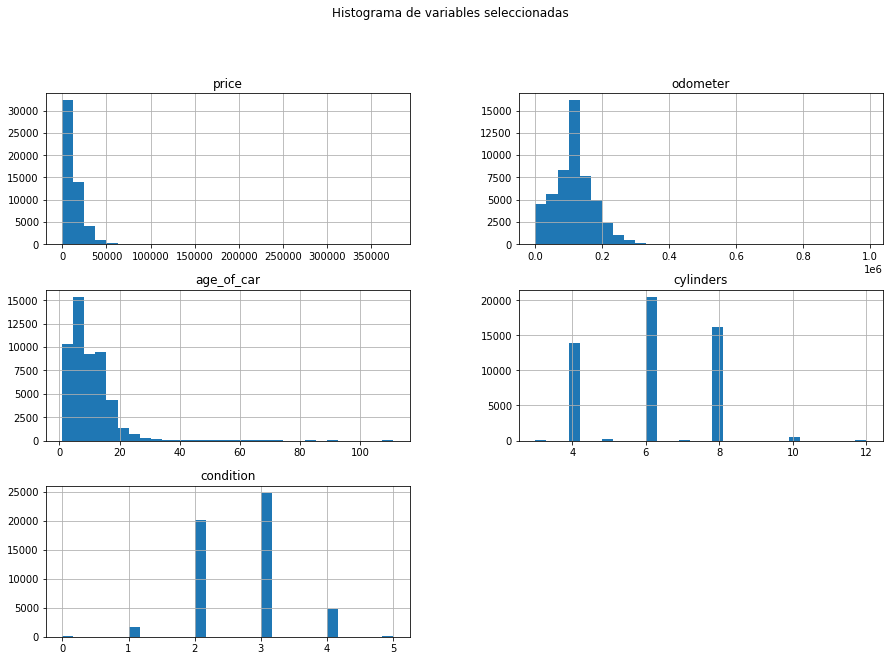

In [ ]:
# Vista general Histogramas de variables seleccionadas
df_clean[['price', 'odometer', 'age_of_car','cylinders', 'condition']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograma de variables seleccionadas', y= 1);

Analicemos una a una las variables

In [ ]:
df_clean['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

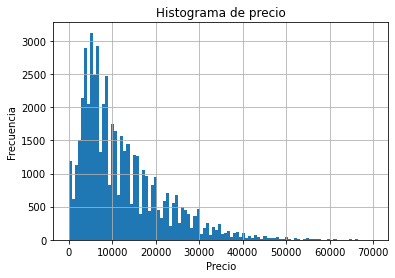

In [ ]:
# histograma de precio
df_clean['price'].hist(bins=100, range=[0, 70000])

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title("Histograma de precio");

Aqui lo que muestra el grafico de precio es el promedio de la columna está en 11.500 sin embargo existen datos atípicos significativos debido que tenemos valores de 1 a 375.000.

In [ ]:
df_clean['odometer'].describe()

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

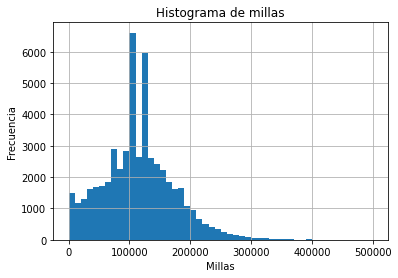

In [ ]:
# histograma de millas
df_clean['odometer'].hist(bins=50, range=[0, 500000])

plt.xlabel('Millas')
plt.ylabel('Frecuencia')
plt.title("Histograma de millas");

Aqui lo que muestra el grafico de millas es la mayor cantidad de datos se concentra entre 0 y 200.000, El promedio de la columna está en 118.000, pero aqui también tenemos datos atípicos significativos debido que tenemos datos desde 0 a 990.000 millas.

In [ ]:
df_clean['age_of_car'].describe()

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age_of_car, dtype: float64

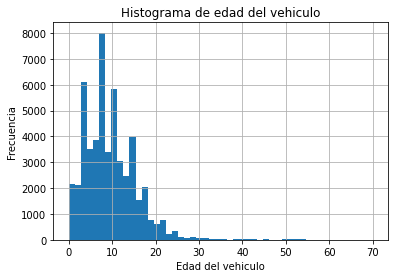

In [ ]:
# histograma de edad del vehiculo
df_clean['age_of_car'].hist(bins=50, range=[0, 70])

plt.xlabel('Edad del vehiculo')
plt.ylabel('Frecuencia')
plt.title("Histograma de edad del vehiculo");

Aqui lo que muestra el grafico de edad del vehículo, que la mayor cantidad de datos se concentra entre 0 y 18 años, El promedio de la columna está en 8.9, además de concluir que también tenemos datos atípico significativos debido que van desde el 1 a 110 años.

In [ ]:
df_clean['cylinders'].describe()

count    51525.000000
mean         6.126230
std          1.583377
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

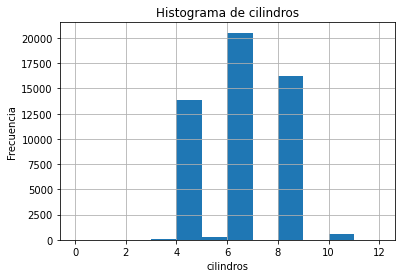

In [ ]:
# histograma de cilindros
df_clean['cylinders'].hist(bins=12, range=[0, 12])

plt.xlabel('cilindros')
plt.ylabel('Frecuencia')
plt.title("Histograma de cilindros");

Aqui lo que muestra el grafico de cilindros, es que los vehículos con 6 y 8 cilindros están mayoritariamente representados en los datos, El promedio de la columna está en 6.1, en esta columna no tenemos datos atípicos significativos.

In [ ]:
df_clean['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

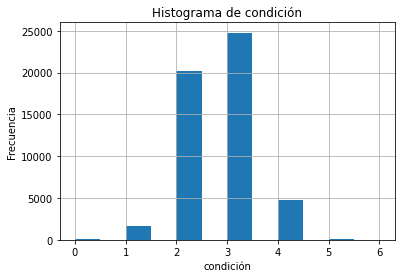

In [ ]:
# histograma de condición
df_clean['condition'].hist(bins=12, range=[0, 6])
 
plt.xlabel('condición')
plt.ylabel('Frecuencia')
plt.title("Histograma de condición");

Aqui muestra el grafico de condición del vehículo, que la mayoría de los vehículos están en buenas o excelentes condiciones. El promedio de la columna está en 2.6, aunque existen datos desde 0 a 5 , lo que indica que no tenemos datos atípicos significativos. 

## Estudiar y tratar valores atípicos

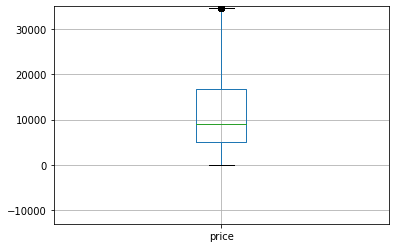

In [ ]:
# Determina los límites inferiores para valores atípicos
plt.ylim(-13000, 35000)
df_clean.boxplot(column='price');

In [ ]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
Limite_inferior = Q1 - 1.5 * IQR
print(Limite_inferior)

-12758.5


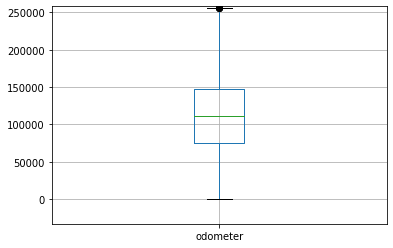

In [ ]:
plt.ylim(-33000, 258000)
df_clean.boxplot(column='odometer');

In [ ]:
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1
Limite_inferior = Q1 - 1.5 * IQR
print(Limite_inferior)

-32561.5


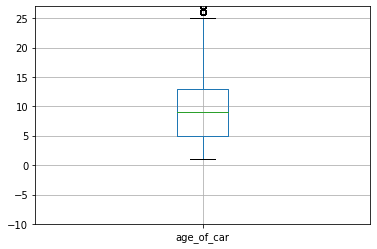

In [ ]:
plt.ylim(-10, 27)
df_clean.boxplot(column='age_of_car');

In [ ]:
Q1 = df_clean['age_of_car'].quantile(0.25)
Q3 = df_clean['age_of_car'].quantile(0.75)
IQR = Q3 - Q1
Limite_inferior = Q1 - 1.5 * IQR
print(Limite_inferior)

-7.0


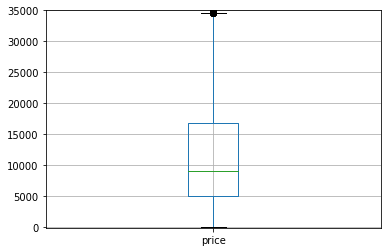

In [ ]:
# Determinar los límites superiores para valores atípicos
plt.ylim(-100, 35000)
df_clean.boxplot(column='price');

In [ ]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
Limite_superior = Q3 + 1.5 * IQR
print(Limite_superior)

34597.5


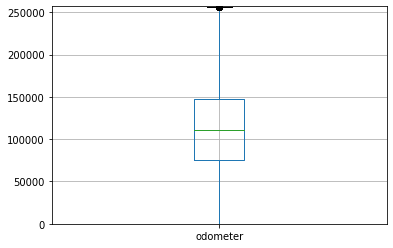

In [ ]:
plt.ylim(-100, 257000)
df_clean.boxplot(column='odometer');

In [ ]:
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1
Limite_superior = Q3 + 1.5 * IQR
print(Limite_superior)

256050.5


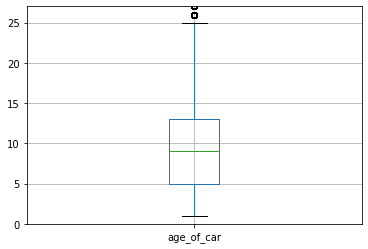

In [ ]:
plt.ylim(0, 27)
df_clean.boxplot(column='age_of_car');

In [ ]:
Q1 = df_clean['age_of_car'].quantile(0.25)
Q3 = df_clean['age_of_car'].quantile(0.75)
IQR = Q3 - Q1
Limite_superior = Q3 + 1.5 * IQR
print(Limite_superior)

25.0


In [ ]:
# Almacena los datos sin valores atípicos en un DataFrame separado
new_df = df_clean.query('price < 34598 and odometer < 256050 and age_of_car < 25')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48149 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           48149 non-null  int64         
 1   model_year      48149 non-null  int64         
 2   model           48149 non-null  object        
 3   condition       48149 non-null  int64         
 4   cylinders       48149 non-null  int64         
 5   fuel            48149 non-null  object        
 6   odometer        48149 non-null  int64         
 7   transmission    48149 non-null  object        
 8   type            48149 non-null  object        
 9   paint_color     48149 non-null  object        
 10  is_4wd          48149 non-null  bool          
 11  date_posted     48149 non-null  datetime64[ns]
 12  days_listed     48149 non-null  int64         
 13  dow             48149 non-null  int64         
 14  week            48149 non-null  UInt32        
 15  mo

## Estudiar parámetros principales sin valores atípicos

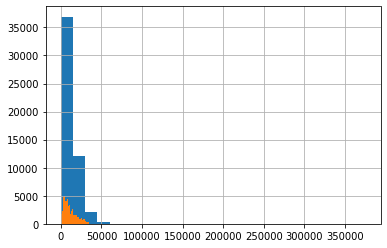

In [ ]:
df_clean['price'].hist(bins=25)
new_df['price'].hist(bins=25);

In [ ]:
print(df_clean['price'].describe())
print('----------------------')
print(new_df['price'].describe())

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
----------------------
count    48149.000000
mean     11255.842281
std       7829.979364
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64


Al ver los dos gráficos de datos limpios(new_df) con el grafico de datos sin limpiar(df_clean) Se reduce eficiente los datos atípicos. La media pasó de 12132 a 11255, lo que nos permite realizar un análisis más certero.

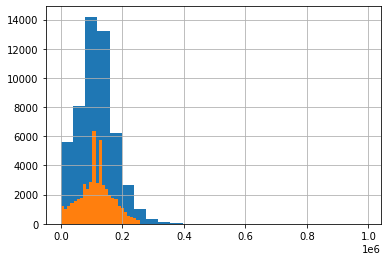

In [ ]:
df_clean['odometer'].hist(bins=25)
new_df['odometer'].hist(bins=25);

In [ ]:
print(df_clean['odometer'].describe())
print('----------------------')
print(new_df['odometer'].describe())

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64
----------------------
count     48149.000000
mean     113626.881098
std       53103.590367
min           0.000000
25%       78600.000000
50%      111833.000000
75%      146000.000000
max      256000.000000
Name: odometer, dtype: float64


Al comparar ambos gráficos de la columna odometer, podemos ver que al eliminar 2636 registro fuera de norma, la media se trasladó de 115199 a 113626.

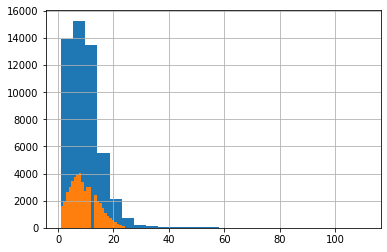

In [ ]:
df_clean['age_of_car'].hist(bins=25)
new_df['age_of_car'].hist(bins=25);

In [ ]:
print(df_clean['age_of_car'].describe())
print('----------------------')
print(new_df['age_of_car'].describe())

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age_of_car, dtype: float64
----------------------
count    48149.000000
mean         9.176182
std          4.982878
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         24.000000
Name: age_of_car, dtype: float64


Aqui no podemos ver mucha diferencia entre un gráfico y otro, debido que la distribución de la columna es más equilibrada que en las anteriores columnas, lo que si se eliminó los datos atípicos.

## Periodo de colocación de los anuncios

In [ ]:
df_clean['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

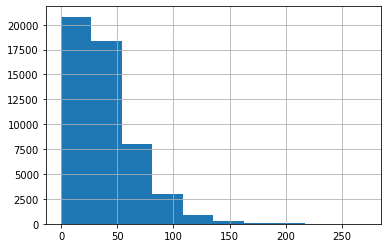

In [ ]:
df_clean['days_listed'].hist();

In [ ]:
print(df_clean['days_listed'].mean())
print(df_clean['days_listed'].median())

39.55475982532751
33.0


In [ ]:
df_clean.query('days_listed <5').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
39,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,True,2019-03-31,1,6,13,3,2019,11,21272
59,5200,2006,toyota highlander,2,6,gas,186000,automatic,SUV,green,False,2018-12-20,2,3,51,12,2018,13,14307
75,6950,2005,chevrolet tahoe,3,6,gas,186021,automatic,SUV,others,True,2018-10-30,3,1,44,10,2018,14,13287
84,4995,2013,hyundai elantra,4,4,gas,151223,automatic,sedan,custom,False,2018-09-15,1,5,37,9,2018,6,25203
120,33900,2018,chevrolet silverado 1500 crew,2,8,gas,11315,other,pickup,white,True,2019-03-01,2,4,9,3,2019,2,5657


In [ ]:
df_clean.query('days_listed < 100').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018,8,18125
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018,8,11088
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,17,10683
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019,3,26967


In [ ]:
new_df = new_df.query('5 < days_listed <= 100')
new_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018,8,18125
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018,8,11088
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,17,10683
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019,3,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,40,10,2018,6,14689
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,46,11,2018,17,10676
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,46,11,2018,10,12800
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,27,7,2018,6,23262


In [ ]:
days_listed_new = df_clean.query('5 <= days_listed <= 100').pivot_table(index="type", values="days_listed", aggfunc=['mean', 'count'])
days_listed_new.columns = ['days_listed_mean', 'vehiculos']
days_listed_new.sort_values(by='days_listed_mean', ascending=False).head(10)

,days_listed_mean,vehiculos
type,,
bus,43.500000,24
hatchback,38.341863,977
wagon,37.591519,1415
pickup,37.344507,6563
truck,37.227794,11607
SUV,37.201137,11614
sedan,36.984718,11386
offroad,36.979695,197
other,36.816327,245


    Los anuncios fueron mostrados entre 0 y 270 días. La media está en 39.6 y la mediana en 33, Finalmente el periodo habitual de colocación es entre 5 y 100 días, Donde menos de 5 días es un periodo donde se eliminaron rápidamente las publicaciones y sobre 100 días equivale a un periodo largo de publicación.
    
    Se realizo una tabla filtrada con los vehículos que tuvieron más de 5 días de anuncio y los que tuvieron menos de 100 días, los filtraremos por tipo de vehículo, para mostrar en esta tabla filtrada las medias de días de anuncio son parecidos para todos los tipos de vehículos.

## Precio promedio por cada tipo de vehículo

In [ ]:
vehicles_stat_price = new_df.query('5 <= days_listed <= 100').pivot_table(
    index='type', values = 'price', aggfunc = 'mean')
vehicles_stat = days_listed_new.join(vehicles_stat_price, on='type').reset_index()
print(vehicles_stat)

           type  days_listed_mean  vehiculos         price
0           SUV         37.201137      11614  10466.562034
1           bus         43.500000         24  18107.428571
2   convertible         36.524038        416  13273.738170
3         coupe         36.348751       2162  13526.557651
4     hatchback         38.341863        977   6828.567742
5      mini-van         36.496750       1077   8063.533906
6       offroad         36.979695        197  14496.545455
7         other         36.816327        245  10378.457014
8        pickup         37.344507       6563  15137.996560
9         sedan         36.984718      11386   6984.806773
10        truck         37.227794      11607  15176.240748
11          van         36.617347        588   8730.427203
12        wagon         37.591519       1415   8997.426471


In [ ]:
# precio promedio para cada tipo de vehículo
avg_vehiculo = new_df.pivot_table(index='type', values='price', aggfunc='mean')
avg_vehiculo

,price
type,
SUV,10466.562034
bus,18107.428571
convertible,13273.738170
coupe,13526.557651
hatchback,6828.567742
mini-van,8063.533906
offroad,14496.545455
other,10378.457014
pickup,15137.996560


In [ ]:
# cantida de anuncios por vehiculos
new_df.query('5 <= days_listed <= 100').pivot_table(
    index='type', values = 'days_listed', aggfunc = 'count').sort_values(by="days_listed", ascending=False)

,days_listed
type,
sedan,11132
SUV,10994
truck,10268
pickup,5814
coupe,1856
wagon,1360
mini-van,1047
hatchback,930
van,522


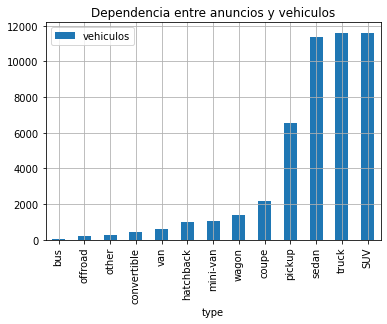

In [ ]:
vehicles_stat.sort_values(by='vehiculos',ascending = True).plot(x='type', y='vehiculos', title='Dependencia entre anuncios y vehiculos',kind='bar',grid=True);

Después de analizar los datos, las categorías de vehículos con más anuncios son SUV y Sedan.

## Factores de precio

In [ ]:
popular_vehicles_filtered = new_df.query('5 <= days_listed <= 100')
popular_vehicles_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018,8,18125
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018,8,11088
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,17,10683
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019,3,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,40,10,2018,6,14689
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,46,11,2018,17,10676
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,46,11,2018,10,12800
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,27,7,2018,6,23262


In [ ]:
print(popular_vehicles_filtered[['price', 'age_of_car', 'odometer', 'transmission', 'paint_color', 'condition']].corr())

               price  age_of_car  odometer  condition
price       1.000000   -0.509852 -0.406254   0.183362
age_of_car -0.509852    1.000000  0.529047  -0.266868
odometer   -0.406254    0.529047  1.000000  -0.303045
condition   0.183362   -0.266868 -0.303045   1.000000


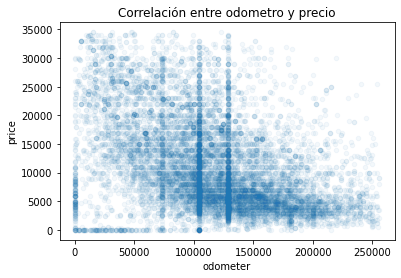

In [ ]:
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y= 'price', x= 'odometer', title= 'Correlación entre odometro y precio', alpha=0.05);

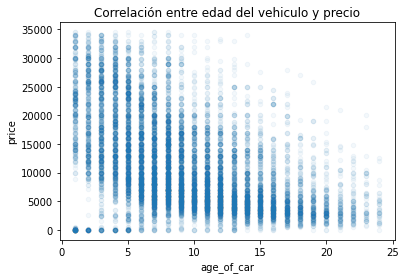

In [ ]:
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y= 'price', x= 'age_of_car', title= 'Correlación entre edad del vehiculo y precio', alpha=0.05);

Aqui al analizar el gráfico se puede saber que a mayor cantidad de años del vehículo menor es su precio.

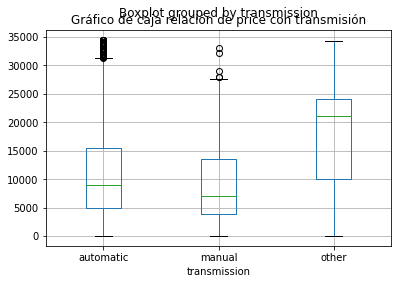

In [ ]:
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='transmission', column='price'))
plt.title('Gráfico de caja relación de price con transmisión')
plt.show();

Aqui podemos observar en el gráfico de caja, los vehículos automáticos son más caros que los vehículos de transmisión manual.

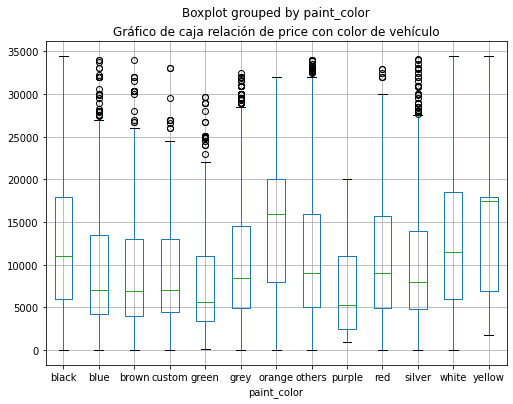

In [ ]:
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='paint_color', column='price', figsize=(8,6)))
plt.title('Gráfico de caja relación de price con color de vehículo')
plt.show();

Aqui podemos ver en el grafico que los colores amarillos y naranjo, son los vehículos más caros.

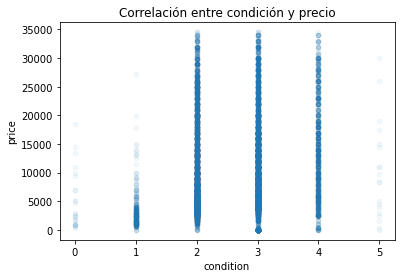

In [ ]:
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y= 'price', x= 'condition', title= 'Correlación entre condición y precio', alpha=0.05);

Podemos concluir que los vehículos que están en estados buenos en general, Son los con mayor precio. si bien la condición 5(new)al no figurar en los precios más altos nos da a entender que este tipo de vehículos no se compran a traves de anuncios. Para las condiciones más deplorables(0 y 1) sus precios son más bajos.

## Conclusión general

# 1-El gráfico de correlación con el kilometraje muestra una correlación negativa, a mayor kilometraje, menor es el precio.

2-El gráfico de correlación de la edad del vehículo con el precio. Podemos ver que a medida que aumenta la edad de un vehículo, el precio disminuye. Por el contrario, la gráfica del precio indica que mientras más nuevo es el modelo del vehículo más aumenta el precio.

3-El estado del vehículo también afecta al precio como pudimos ver en los datos, los vehículos con características de buenas, excelentes y como nuevas, tienen un valor más alto que en otras condiciones.

4-El tipo de transmisión del vehículo también afecta el precio del vehículo, como se puede ver en el gráfico de caja de correlación del tipo de transmisión, podemos afirmar que los vehículos de transmisión automática son más caros que los vehículos de transmisión manual.

5-El color del vehículo, no afecta significativamente en el precio del vehículo, debido que no existe una correlación entre el color y el precio

  Se realizó lo siguiente:
    
-Primero se analizaron los datos ausentes de cada columna del df. Después se sacó el % de esos valores ausentes por columna, llegando a la conclusión que los datos ausentes de las columnas con menos %, "model_year" y "cylinders", se imputaron por la media . Las otras 3 columnas se transformaron los valores ya que él % de ausentes era mayor

-Luego se trabajó cambiando las columnas con tipo float a int para realizar un mejor análisis.

-Luego en la columna "date_posted", se cambió de tipo objeto a datatime. Además, creamos columnas de día de la semana, semana y mes de cuando fue publicado el anuncio

-Luego se crearon columnas de "age_of_car" y "avg_odometer_year" y se cambiaron los parámetros de la columna "condition" por valores numéricos. En la columna "avg_odometer_year" aparecieron valores inf, por lo que los cambiamos a NaN y posteriormente cambiamos los NaN a valores 0.

-Se realizaron histogramas de las columnas a analizar para tener una vista general. Luego, se hicieron diferentes histogramas para analizar los valores atípicos. Se evaluaron los valores atípicos con gráficos de caja y se empezó a trabajar con los valores filtrados sin valores atípicos.

-comenzamos a trabajar con los días de publicación en nuestro nuevo dataframe, y comparamos con histogramas entre el antiguo dataframe y el nuevo.

-Concluimos que con el nuevo dataframe, que la media de los días de anuncio era de 39 días, por lo que empezamos a trabajar desde ahí.

-Comenzamos a ver la correlación entre el precio del vehículo con las columnas de edad, millaje, condición, tipo de transmisión y color del vehículo, teniendo solo en cuenta los vehículos con más de 50 anuncios.
